Студент характеризується іменем і прізвищем та ідентифікаційним но- мером studID. Дані студентів знаходяться в окремому файлі.
Результати виконання індивідуальних завдань знаходяться в кількох окремих файлах, назва яких має формат "taskXX", де ХХ двоцифровий номер завдання. Формат результатів: studID, невід'єне ціле число.
Отримати засобами Pandas вказані в завданнях дані і візуалізувати їх:
1. Побудувати загальний DataFrame з колонками 'Student', 'Task01', 'Task02', 'Task03', ..., 'TaskON'.
1а. Для колонки, назва якої вибрана з випадаючого списку, отримати рейтинг студентів.
16. Для колонки, назва якої вибрана з випадаючого списку, побудувати діаграму результатів.
1в. Для колонки, назва якої вибрана з випадаючого списку, отримати середнє значення результатів.
2. Додати до датафрейму колонку 'Total' із сумою результатів.
2а. Побудувати діаграму результатів для 'Total'.
3. Вважаючи, що максимально можливий результат в 'Total' 100 балів, додати колонку з оцінками у болонській системі.
4. Отримати список студентів із заданою з віджета оцінкою, впорядко- ваний за балами.
5. Для студента, прізвище та ім'я якого вибрано з випадаючого списку, отримати найменший та найбільший поточний результати і назви відповід- них завдань.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as w

In [2]:
class V():          
    @staticmethod
    def verify_name(func):
        def func_wrapper(self, name):
            if not all(x.isalpha() or x.isspace() for x in name):
                print("Names should only contain alphabetic symbols")
                func(self, None)
            else:
                func(self, name)
        return func_wrapper
    
    @staticmethod
    def verify_id(func):
        def func_wrapper(self, id):
            if id <= 0:
                print("ID must be bigger than 0")
                func(self, None)
            else:
                func(self, name)
        return func_wrapper

In [3]:
class Student():
    def __init__(self, first_name, last_name, stud_id):
        self.set_first_name(first_name)
        self.set_last_name(last_name)
        self.set_stud_id(stud_id)
    
    @V.verify_name
    def set_first_name(self, name):
        self.first_name = name

    @V.verify_name
    def set_last_name(self, name):
        self.last_name = name
    
    @V.verify_id
    def set_stud_id(self, id):
        self.stud_id = id

In [4]:
students = pd.read_csv("students.csv")

task01 = pd.read_csv("task01.csv")
task02 = pd.read_csv("task02.csv")
task03 = pd.read_csv("task03.csv")

In [11]:
data = pd.DataFrame([[students.loc[i].at["Student ID"], task01.loc[i].at["Result"], task02.loc[i].at["Result"], task03.loc[i].at["Result"]] for i in range(int(students.size / 3))], columns=['Student', 'Task01', 'Task02', 'Task03'])
data

,Student,Task01,Task02,Task03
0,1,90,85,83
1,2,89,86,81
2,3,51,72,63
3,4,100,98,90
4,5,81,86,78
5,6,0,51,40


In [7]:
droplist = w.Dropdown(
    options=data.filter(like="Task").columns,
    description='Select:',
)
output = w.Output()

def on_string_change(change):
    with output:
        output.clear_output()
        display(data[['Student', change['new']]])  # Task 1a
        plt.plot(data[change['new']])
        plt.show()                                 # Task 1b
        print("Arithmetic mean: " + f"{round(sum([x for x in data[change['new']]]) / len(data.index), 2)}")  # Task 1c

droplist.observe(on_string_change, names='value')
display(droplist, output)

Dropdown(description='Select:', options=('Task01', 'Task02', 'Task03'), value='Task01')

Output()

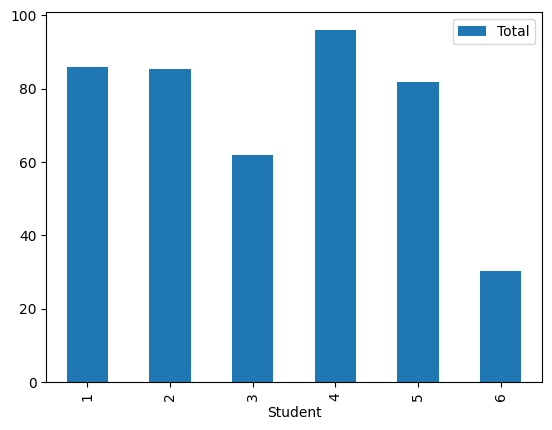

In [8]:
total = []
for i in range(len(data.index)):
    total.append(round((data["Task01"][i] + data["Task02"][i] + data["Task03"][i]) / 3, 2))
data["Total"] = total
data.plot.bar("Student", "Total");

In [9]:
def bologne(num):
    if(num < 51): return "F"
    if(num < 61): return "E"
    if(num < 71): return "D"
    if(num < 81): return "C"
    if(num < 90): return "B"
    return "A"

data["Bologne"] = [bologne(data["Total"][x]) for x in range(len(data.index))]

data

,Student,Task01,Task02,Task03,Total,Bologne
0,1,90,85,83,86.00,B
1,2,89,86,81,85.33,B
2,3,51,72,63,62.00,D
3,4,100,98,90,96.00,A
4,5,81,86,78,81.67,B
5,6,0,51,40,30.33,F


In [10]:
drop = w.Dropdown(
    options=["A", "B", "C", "D", "E", "F"],
    description='Select:',
)
out = w.Output()

def on_mark_change(change):
    with out:
        out.clear_output()
        display(data.where(data["Bologne"]==change['new']).sort_values("Total", ascending=False))

drop.observe(on_mark_change, names='value')
display(drop, out)

Dropdown(description='Select:', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A')

Output()